# Смещение

Продолжаем работать с таблицей `employees`: 

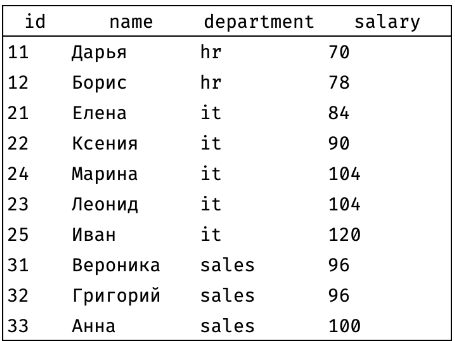

### 5 Зарплата предыдущего и следующего сотрудника

Есть таблица сотрудников employees. Мы хотим для каждого сотрудника увидеть зарплаты предыдущего и следующего коллеги:

Сортировка результата: salary, id

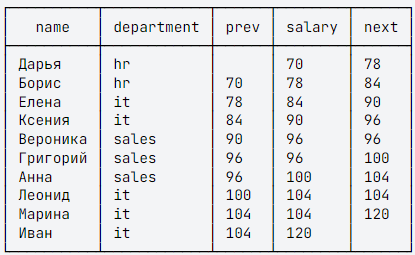

In [ ]:
SELECT name, 
       department, 
       LAG(salary, 1) OVER w AS prev,
       salary,
       LEAD(salary, 1) OVER w AS next
  FROM employees
WINDOW w AS (ORDER BY salary)
cORDER BY salary, id

### 6 Процент от максимальной зарплаты в городе

Есть таблица сотрудников employees. Мы хотим для каждого сотрудника увидеть, сколько процентов составляет его зарплата от максимальной в городе:

Сортировка результата: city, salary

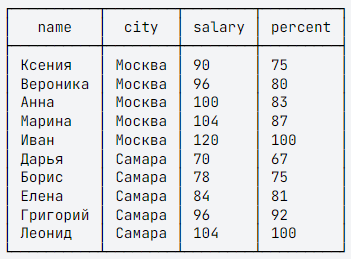

Первый способ решения:

In [ ]:
SELECT name, 
       city, 
       salary,
       ROUND(100 * (salary / MAX(salary) OVER (PARTITION BY city))) AS percent
  FROM employees
 ORDER BY city, salary

Второй способ решения:

In [ ]:
SELECT name, 
       city, 
       salary, 
       ROUND(salary * 100.0 / LAST_VALUE(salary) OVER w) AS percent
  FROM employees
WINDOW w AS (PARTITION BY city
 ORDER BY salary
  ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING)
 ORDER BY city, salary, id;